In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
seeds=pd.read_csv("C:/Users/acer/Downloads/Compressed/ML/Clustering/Case study/Case 1/seeds.csv")

In [6]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


In [7]:
# grain variety column will not be given in real life data

In [8]:
# so dropping the "grain variety" column

In [10]:
variety = seeds['grain_variety']                # "grain_variety column is stored in new variable for future use"

In [11]:
seeds.drop('grain_variety',axis=1,inplace=True)         # now "grain_variety" is dropped 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(seeds,variety,test_size=0.3,random_state=0)

In [14]:
x_train.shape

(147, 7)

In [15]:
y_train.shape

(147,)

In [18]:
samples = x_train.values

In [16]:
# scaling

In [20]:
from sklearn import preprocessing

In [21]:
scaler = preprocessing.StandardScaler()

In [22]:
scaler.fit(samples)           # calculates the mean and stdev. for each column

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
x = scaler.transform(samples)

In [29]:
print(x)
print(x.shape)

[[-1.18859631 -1.4165965   0.611144   ... -0.96114168 -0.94679741
  -1.37730754]
 [ 0.10231379  0.20001804 -0.20796739 ...  0.01237661 -1.26075807
  -0.77564884]
 [-0.52948083 -0.51341749 -0.1855873  ... -0.70579262 -1.87547727
  -0.66460445]
 ...
 [ 1.51616771  1.48268403  0.83494492 ...  1.52851166 -0.41148792
   1.61483403]
 [ 0.09548358  0.04822324  0.80361279 ...  0.36348157 -0.49424742
  -0.42434477]
 [-1.17493588 -1.15854535 -1.2732598  ... -1.26968847  0.39311837
  -0.77766783]]
(147, 7)


In [30]:
from sklearn.cluster import KMeans

In [31]:
# first we are trying to find optimum value for "k"

In [32]:
ks = range(1, 10)
inertias_values = []

for k in ks:
    
    model = KMeans(n_clusters=k)     # Create a KMeans instance with k clusters: model
    
    model.fit(x)      # Fit model to samples
    
    inertias_values.append(model.inertia_)        # Append the inertia to the list of inertias

In [33]:
inertias_values

[1029.0,
 452.21184807989437,
 300.51851670072847,
 251.06994257126357,
 217.19271558107144,
 193.9486185318915,
 173.75438762471995,
 158.83428751765666,
 147.32959221083655]

In [34]:
import matplotlib.pyplot as plt

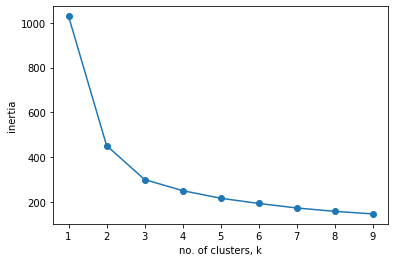

In [35]:
plt.plot(ks, inertias_values, 'o-')
plt.xlabel('no. of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [36]:
# sudden direction change of line is at k=3

In [49]:
final_model = KMeans(n_clusters=3)
final_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
test_samples=x_test.values
test=scaler.transform(test_samples)

In [51]:
clusters = final_model.predict(test)

In [52]:
clusters

array([2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1,
       2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0])

In [54]:
clusters.shape

(63,)

In [53]:
#checking the model 

df = pd.DataFrame({'labels': clusters, 'varieties': y_test})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,2,22
1,17,2,0
2,0,15,5
